<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/hungarian/python/pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Esettanulmány a $\pi$ értékének kiszámítására

Néhány módszert tekintünk át a $\pi$ értékének kiszámítására időrendben.

## Archimédész módszere

Archimédész Kr.e. 287 és Kr.e. 212 között élt görög matematikus.

Szerkesszünk egy körbe és egy kör köré illeszkedő hatszöget. Ismerve a kör kerületét a hatszögek kerületét a kör átmérőjével osztva egy alsó és egy felső becslést kapunk $\pi$ értékére.

A körbe írt hatszög hat egyenlő oldalú háromszögre bontható, egy ilyen háromszög a kör középpontjából induló oldalaink hossza egyezik a kör sugarával, a közbezárt szögük 60 fok (azaz egyelő oldalú háromszög). Hasonló okokból a köré írt hatszög háromszögei is szabályosak, de az oldahosszuk $2 \cdot R \cdot tan(30)$ és $tan(30) = \frac {1} {\sqrt 3}$

A körbe írt és a kör köré írt szabályos sokszög oldalainak számát növelve pontosabb alsó és felső becslést kaphatunk, de akkor már nem ilyen egyszerű a szögfüggvények számítása. A XVI-XVII. században több százezer oldalú sokszög közelítést is alkalmaztak, így kilenc-tizenöt tizedesre pontos értéket kaptak.

In [9]:
from math import sqrt

RADIUS = 1
SIDES = 6
# side of inscribing polygon
side_in = RADIUS # 2 * RADIUS * sin(30) és sin(30)=0.5
peri_in = 6 * side_in
# side of circumscribing polygon
side_out = 2 * RADIUS / sqrt(3) # 2 * RADIUS * tan(30) és tan(30) = 1/sqrt(3)
print(side_in, side_out)
peri_out = 6 * side_out
diameter = 2 * RADIUS
print(peri_in, peri_out)
pi_in = peri_in / diameter
pi_out = peri_out / diameter
pi = (pi_in + pi_out) / 2
print(f"{pi_in} < pi < {pi_out}")

1 1.1547005383792517
6 6.9282032302755105
3.0 < pi < 3.4641016151377553


##Tsu Csung Chih képlete

Tsu Csung Chih az V. században élt kínai csillagász. Hat tizedesig pontos értéket adott $\pi$-re két egész szám hányadosaként:

$\pi = \frac {355} {113}$

In [51]:
pi = 355 / 113
print(f"pi = {pi}")

pi = 3.1415929203539825


## Matematikai sorok

###Nilakantha-sor

XV. századi indiai matematikus sora:

$\pi = 3 + \sum_{n=1}^{\infty} \frac {4 \cdot (-1)^{n+1}} {2n \cdot (2n + 1) \cdot (2n + 2)}$



In [52]:
LIMIT = 10_000
pi = 3
for i in range(1, LIMIT):
    pi += 4 * (-1)**(i+1) / (2*i * (2*i + 1) * (2*i + 2))
print(f"pi = {pi}")

pi = 3.1415926535900383


###Leibniz-sor

Leibniz egy végtelen matematikai sort írt fel a $\pi$ érték meghatározására.

$\pi = 4 \cdot \sum_{n=0}^{\infty} {\frac {-1^n} {2 \cdot n + 1} = 4 \cdot (1 - \frac{1} {3} + \frac{1} {5} - \frac {1} {7} + ...)}$

Ez a sor viszonylag lassan konververgál.

In [2]:
LIMIT = 100_0000
pi4 = 0
for i in range(LIMIT):
    pi4 += (-1)**i / (2*i + 1)
print(f"pi = {4 * pi4}")

pi = 3.1415916535897743


###Chudnovsky-sor

$\frac {1} {\pi} = 12 \sum_{n=0}^{\infty} \frac {(-1)^n (6n)! (13591409 + 545140134n)} {(3n)! (n!)^3 640320^{3n+3/2}}$

Nagyon gyorsan konvergál.

In [55]:
from math import factorial

LIMIT = 10
s = 0
for i in range(LIMIT):
    s += (-1)**i * factorial(6*i) * (13591409 + 545140134 * i) / \
         (factorial(3*i) * factorial(i)**3 * 640320**(3*i + 3/2))
pi = 1 / (12 * s)
print(f"pi = {pi}")

pi = 3.1415926535897936


## Monte Carlo módszer

Vegyünk fel egy négyzetet és a bele illeszkedő negyed kört. Generáljunk véletlen számokat a négyzeten belül. A körön belüli pontok aránya az összes ponthoz $\pi$ negyed része. A négyzet területe $T_n = r^2$ a körcikk területe $T_k = \frac {r^2 \cdot \pi} {4}$

pi = 3.14384


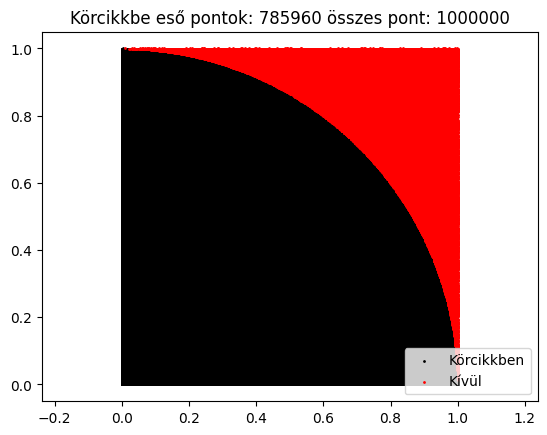

In [50]:
import numpy as np
from matplotlib import pyplot as plt

SIZE = 1
RADIUS = SIZE
NUMP = 1_000_000
points = np.random.rand(NUMP, 2)
dist = np.linalg.norm(points, axis=1)
in_circle = dist < RADIUS
in_pnt = points[in_circle]
out_pnt = points[~in_circle]
pi = 4 * in_pnt.shape[0] / NUMP
print(f"pi = {pi}")
plt.scatter(in_pnt[:, 0], in_pnt[:, 1], c="black", s=1, label="Körcikkben")
plt.scatter(out_pnt[:, 0], out_pnt[:, 1], c="red", s=1, label="Kívül")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('equal')
plt.legend()
_ = plt.title(f"Körcikkbe eső pontok: {in_pnt.shape[0]} összes pont: {NUMP}")